In [1]:
raw_data_x = [[1.4, 0.2],
              [1.7, 0.4],
              [1.5, 0.1],
              [1.9, 0.2],
              [1.6, 0.4],
              [4.7, 1.4],
              [4.9, 1.5],
              [4.0, 1.3],
              [4.4, 1.4],
              [3.9, 1.1]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
x = [4.2, 1.5]

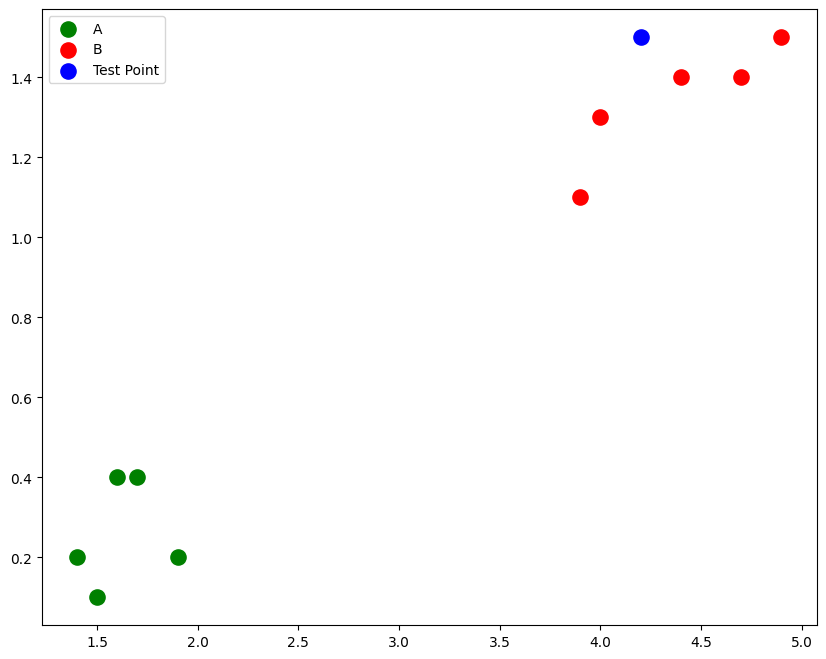

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)
t = np.array(x)

plt.figure(figsize=(10, 8))
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 
            color='g', s=120, label='A')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 
            color='r', s=120, label='B')
plt.scatter(t[0], t[1], color='b', s=120, label='Test Point')
plt.legend()
plt.show()

In [4]:
from math import sqrt

distances = []
for x_i in x_train:
    d = sqrt(np.sum((x_i - t) ** 2))
    distances.append(d)
    
# 使用列表生成式来计算全部距离
distances = [sqrt(np.sum((x_i - t) ** 2)) for x_i in x_train]

In [5]:
nearest = np.argsort(distances)

In [6]:
k = 7
top_k_y = [y_train[i] for i in nearest[:k]]

In [7]:
from collections import Counter

votes = Counter(top_k_y)
most = votes.most_common(1)
predict = most[0][0]

In [8]:
def knn_classify(k, x_train, y_train, x):
    assert 1 <= k <= x_train.shape[0], 'k must be valid'
    assert x_train.shape[0] == y_train.shape[0], 'the size of x_train must be equal to the size of y_train'
    assert x_train.shape[1] == x.shape[0], 'the feature number of x must be equal to x_train'

    distances = [sqrt(np.sum((x_i - x) ** 2)) for x_i in x_train]
    nearest = np.argsort(distances)

    top_k_y = [y_train[i] for i in nearest[:k]]
    votes = Counter(top_k_y)

    return votes.most_common(1)[0][0]

predict = knn_classify(7, x_train, y_train, t)
print(predict)

1


In [9]:
from sklearn.neighbors import KNeighborsClassifier

kNN_classifier = KNeighborsClassifier(n_neighbors=7)
kNN_classifier.fit(x_train, y_train)

x_predict = t.reshape(1, -1)
y_predict = kNN_classifier.predict(x_predict)
print(y_predict)

[1]


In [10]:
class KNNClassifier:
    def __init__(self, k):
        assert k >= 1, 'k must be valid'
        self.k = k
        self._x_train = None
        self._y_train = None
        
    def fit(self, x_train, y_train):
        assert k <= x_train.shape[0], 'k must be valid'
        assert x_train.shape[0] == y_train.shape[0], 'the size of x_train must be equal to the size of y_train'
        
        self._x_train = x_train
        self._y_train = y_train
        return self
    
    def predict(self, x_predict):
        assert self._x_train is not None and self._y_train is not None, 'must fit before predict'
        assert x_predict.shape[1] == self._x_train.shape[1], 'the feature number of x_predict must be equal to x_train'
        
        y_predict = [self._predict(x) for x in x_predict]
        return np.array(y_predict)
    
    def _predict(self, x):
        assert x.shape[0] == self._x_train.shape[1], 'the feature number of x must be equal to x_train'
        
        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._x_train]
        nearest = np.argsort(distances)
        
        top_k_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(top_k_y)
        return votes.most_common(1)[0][0]
    
    def __str__(self):
        return 'KNN(k=%d)' % self.k

In [11]:
knn_clf = KNNClassifier(k=7)
knn_clf.fit(x_train, y_train)
x_predict = t.reshape(1, -1)
y_predict = knn_clf.predict(x_predict)
print(y_predict)

[1]


In [12]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [14]:
print(iris.data[:5, :])
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [15]:
x = iris.data
y = iris.target
print(x.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [17]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
y_predict = knn_clf.predict(x_test)
print(y_predict)
print(f'score: {sum(y_predict == y_test) / len(y_test)}')

[1 2 1 2 0 1 1 2 1 1 1 0 0 0 2 1 0 2 2 2 1 0 2 0 1 1 0 1 2 2]
score: 1.0


In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

1.0


In [19]:
knn_clf.score(x_test, y_test)

1.0

In [20]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train, y_train)
    score = knn_clf.score(x_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print('best_k =', best_k)
print('best_score =', best_score)

best_k = 1
best_score = 1.0


In [21]:
%%time
param_grid = [
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    },
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
]
knn_clf = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid)

grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

KNeighborsClassifier(p=4, weights='distance')
0.9666666666666668
{'n_neighbors': 5, 'p': 4, 'weights': 'distance'}
CPU times: user 152 ms, sys: 2.78 ms, total: 155 ms
Wall time: 155 ms


In [22]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ...............n_neighbors=1, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=3, wei

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [1, 2, ...], 'p': [1, 2, ...], 'weights': ['distance']}, {'n_neighbors': [1, 2, ...], 'weights': ['uniform']}]"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5
